In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Bài 2

In [54]:
data = pd.read_csv('data_linear.csv').values
data

array([[  30.    ,  448.524 ],
       [  32.4138,  509.248 ],
       [  34.8276,  535.104 ],
       [  37.2414,  551.432 ],
       [  39.6552,  623.418 ],
       [  42.069 ,  625.992 ],
       [  44.4828,  655.248 ],
       [  46.8966,  701.377 ],
       [  49.3103,  748.918 ],
       [  51.7241,  757.881 ],
       [  54.1379,  831.004 ],
       [  56.5517,  855.409 ],
       [  58.9655,  866.707 ],
       [  61.3793,  902.545 ],
       [  63.7931,  952.261 ],
       [  66.2069,  995.531 ],
       [  68.6207, 1069.78  ],
       [  71.0345, 1074.42  ],
       [  73.4483, 1103.88  ],
       [  75.8621, 1138.69  ],
       [  78.2759, 1153.13  ],
       [  80.6897, 1240.27  ],
       [  83.1034, 1251.9   ],
       [  85.5172, 1287.97  ],
       [  87.931 , 1320.47  ],
       [  90.3448, 1374.92  ],
       [  92.7586, 1410.16  ],
       [  95.1724, 1469.69  ],
       [  97.5862, 1478.54  ],
       [ 100.    , 1515.28  ]])

In [5]:
#Gọi x là Mét vuông (diện tích), y là Giá (giá nhà)

In [55]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [56]:
one = np.ones((data.shape[0], 1))
xbar = np.concatenate((one, x), axis = 1)
A = np.dot(xbar.T, xbar)
b = np.dot(xbar.T, y)
w = np.dot(np.linalg.pinv(A), b) #Giả nghịch đảo
print('w = ', w)

w =  [[-7.06426865]
 [15.2110908 ]]


In [57]:
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(30, 100, 2, endpoint=True)
y0 = w_0 + w_1*x0

**Model linear regression:**

In [58]:
model = f"{round(w_0, 3)} + {round(w_1, 3)}x"
print(model)

-7.064 + 15.211x


**1. Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).**

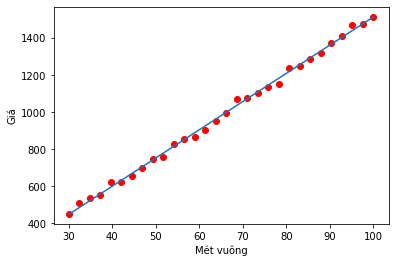

In [59]:
plt.plot(x.T, y.T, 'ro')     # data 
plt.plot(x0, y0)             # the fitting line
plt.xlabel('Mét vuông')
plt.ylabel('Giá')
plt.show()

**2. Dự đoán giá các căn nhà có diện tích 50, 100, 150.**

In [11]:
y1 = w_1*50 + w_0
y2 = w_1*100 + w_0
y3 = w_1*150 + w_0

In [12]:
print('Giá nhà cho 50m^2 là :', y1)

Giá nhà cho 50m^2 là : 753.4902713382899


In [13]:
print('Giá nhà cho 100m^2 là :', y2)

Giá nhà cho 100m^2 là : 1514.0448113217808


In [14]:
print('Giá nhà cho 150m^2 là :', y3)

Giá nhà cho 150m^2 là : 2274.5993513052717


# Bài 3

In [37]:
from numpy.linalg import inv

In [46]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv("housing.csv",header=None, delimiter=r'\s+', names=column_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values
N = boston.shape[0]
y = y.reshape(-1, 1)
y.shape

(506, 1)

In [48]:
ones = np.ones(shape=N).reshape(-1,1)
X = np.concatenate((ones, X), 1)
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [49]:
coef = inv(X.T @X)@X.T @y
coef

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])

In [50]:
def predict(case):
    b_0 = coef[0]
    other_b = coef[1:]
    prediction = b_0
    for x_i, b_i in zip(case, other_b):
        prediction += (b_i * x_i)
        return prediction

In [51]:
predict(X[0])

array([36.35147703])